In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('financial_crisis_data.csv', parse_dates=['Date'])


In [8]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

First few rows of the dataset:
        Date  GDP_Growth  Unemployment_Rate  Inflation_Rate  Interest_Rate  \
0 2000-01-31    0.006181           0.052216        0.006171       0.036908   
1 2000-02-29    0.092607           0.095028        0.004698       0.041867   
2 2000-03-31    0.059799           0.134754        0.070625       0.020019   
3 2000-04-30    0.039799           0.117867        0.004955       0.034995   
4 2000-05-31   -0.026597           0.126787        0.007195       0.032870   

   Stock_Market_Return  Credit_Growth  Housing_Market_Index  Financial_Crisis  
0             0.085998       0.018091            114.825695                 0  
1             0.202716       0.042031             67.238636                 0  
2             0.180080       0.156364            137.239456                 0  
3            -0.123050       0.002001            111.311624                 0  
4            -0.125375       0.160895             65.720388                 0  

Missing values in t

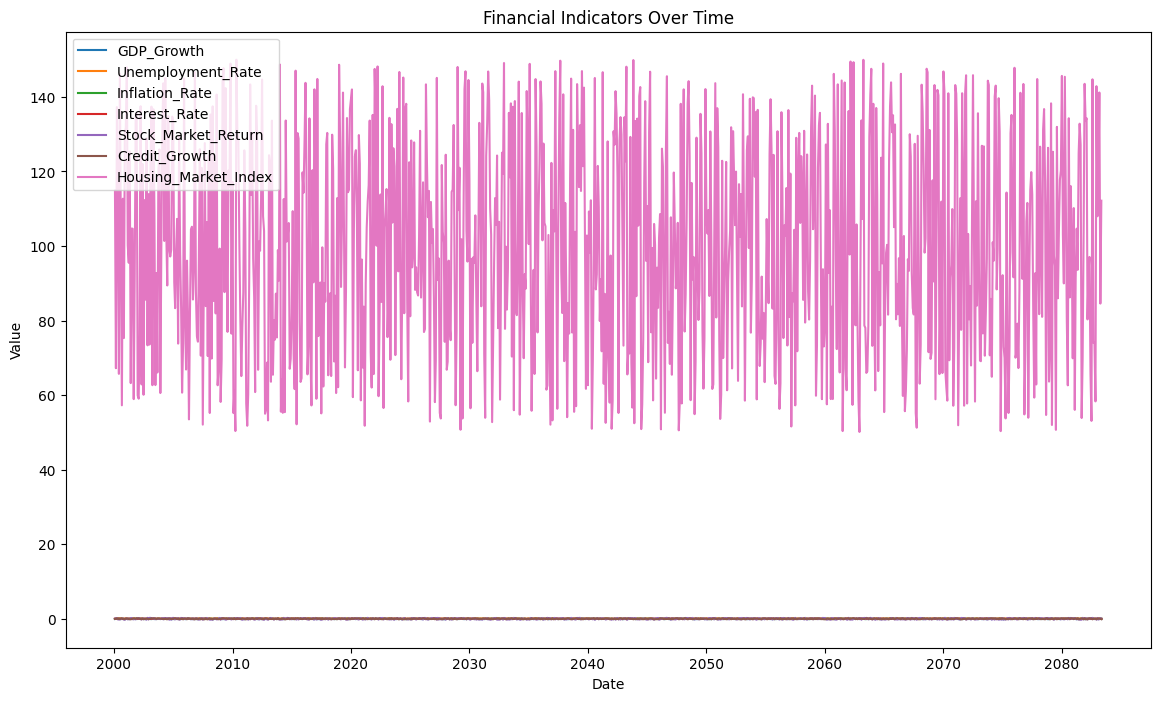

In [9]:
# Plotting the time series of each feature
plt.figure(figsize=(14, 8))
for column in df.columns[1:-1]:
    plt.plot(df['Date'], df[column], label=column)
plt.title('Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

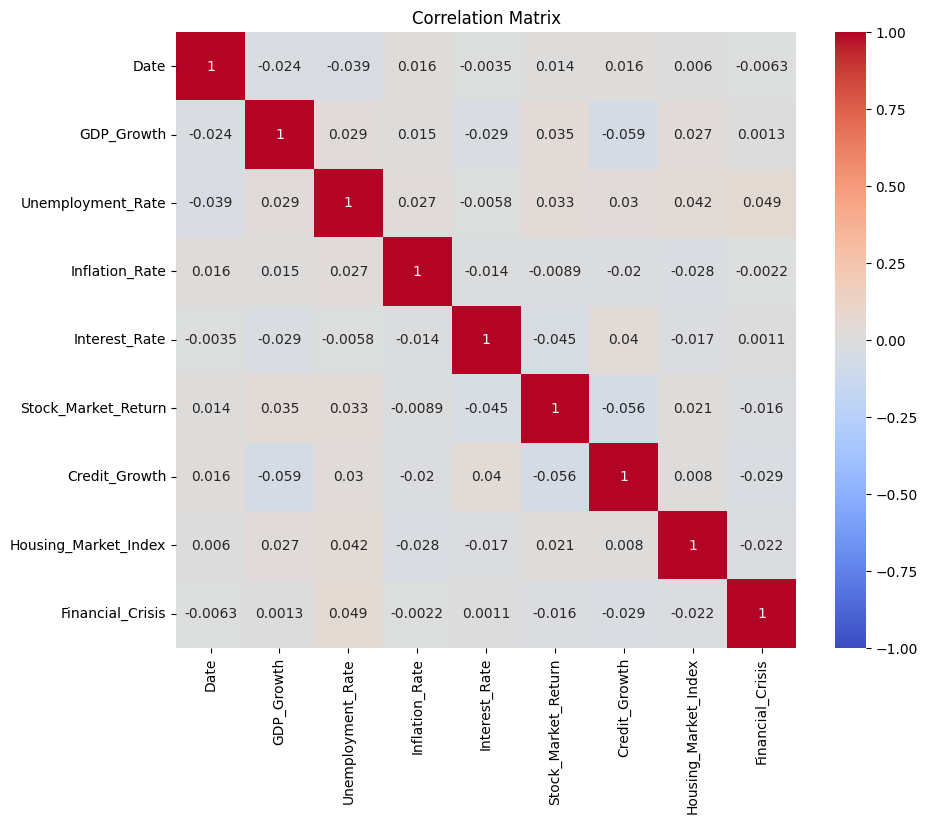

In [10]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

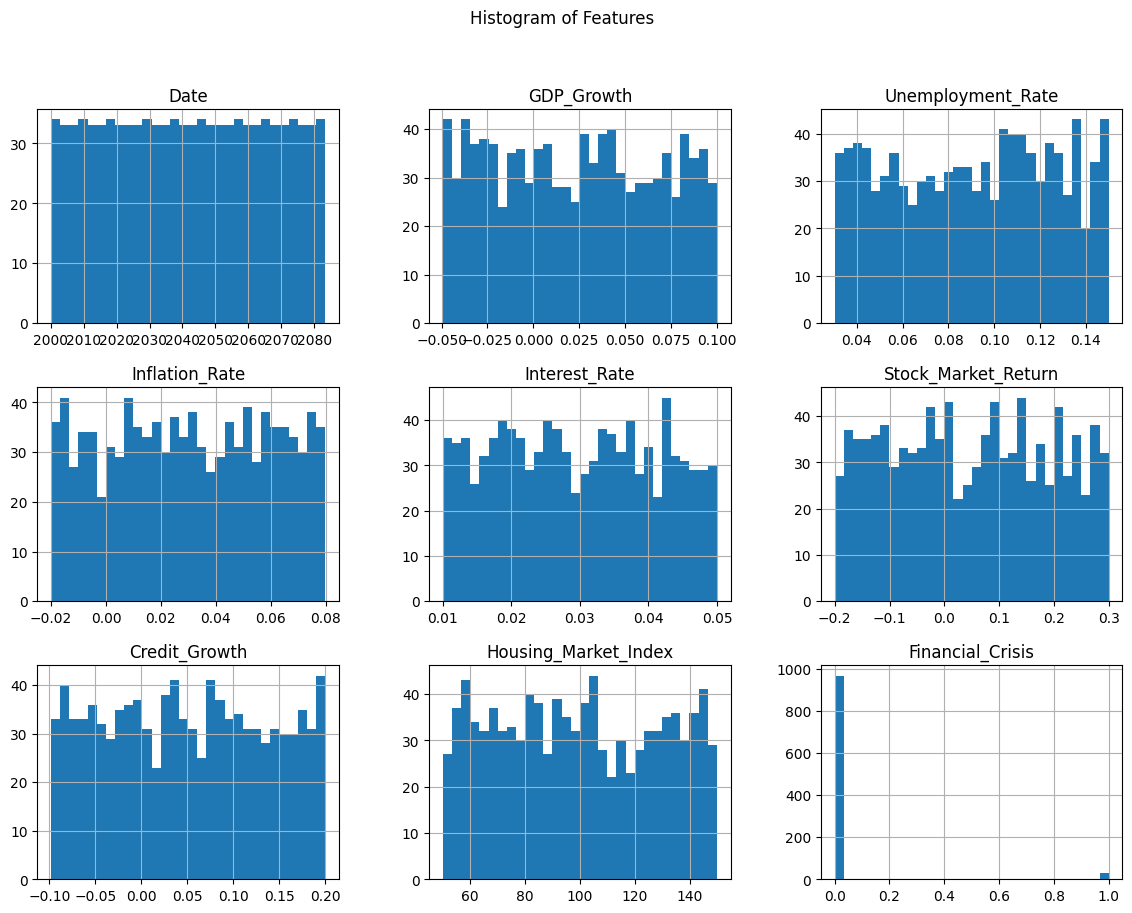

In [11]:
# Plot histograms of each feature
df.hist(bins=30, figsize=(14, 10))
plt.suptitle('Histogram of Features')
plt.show()

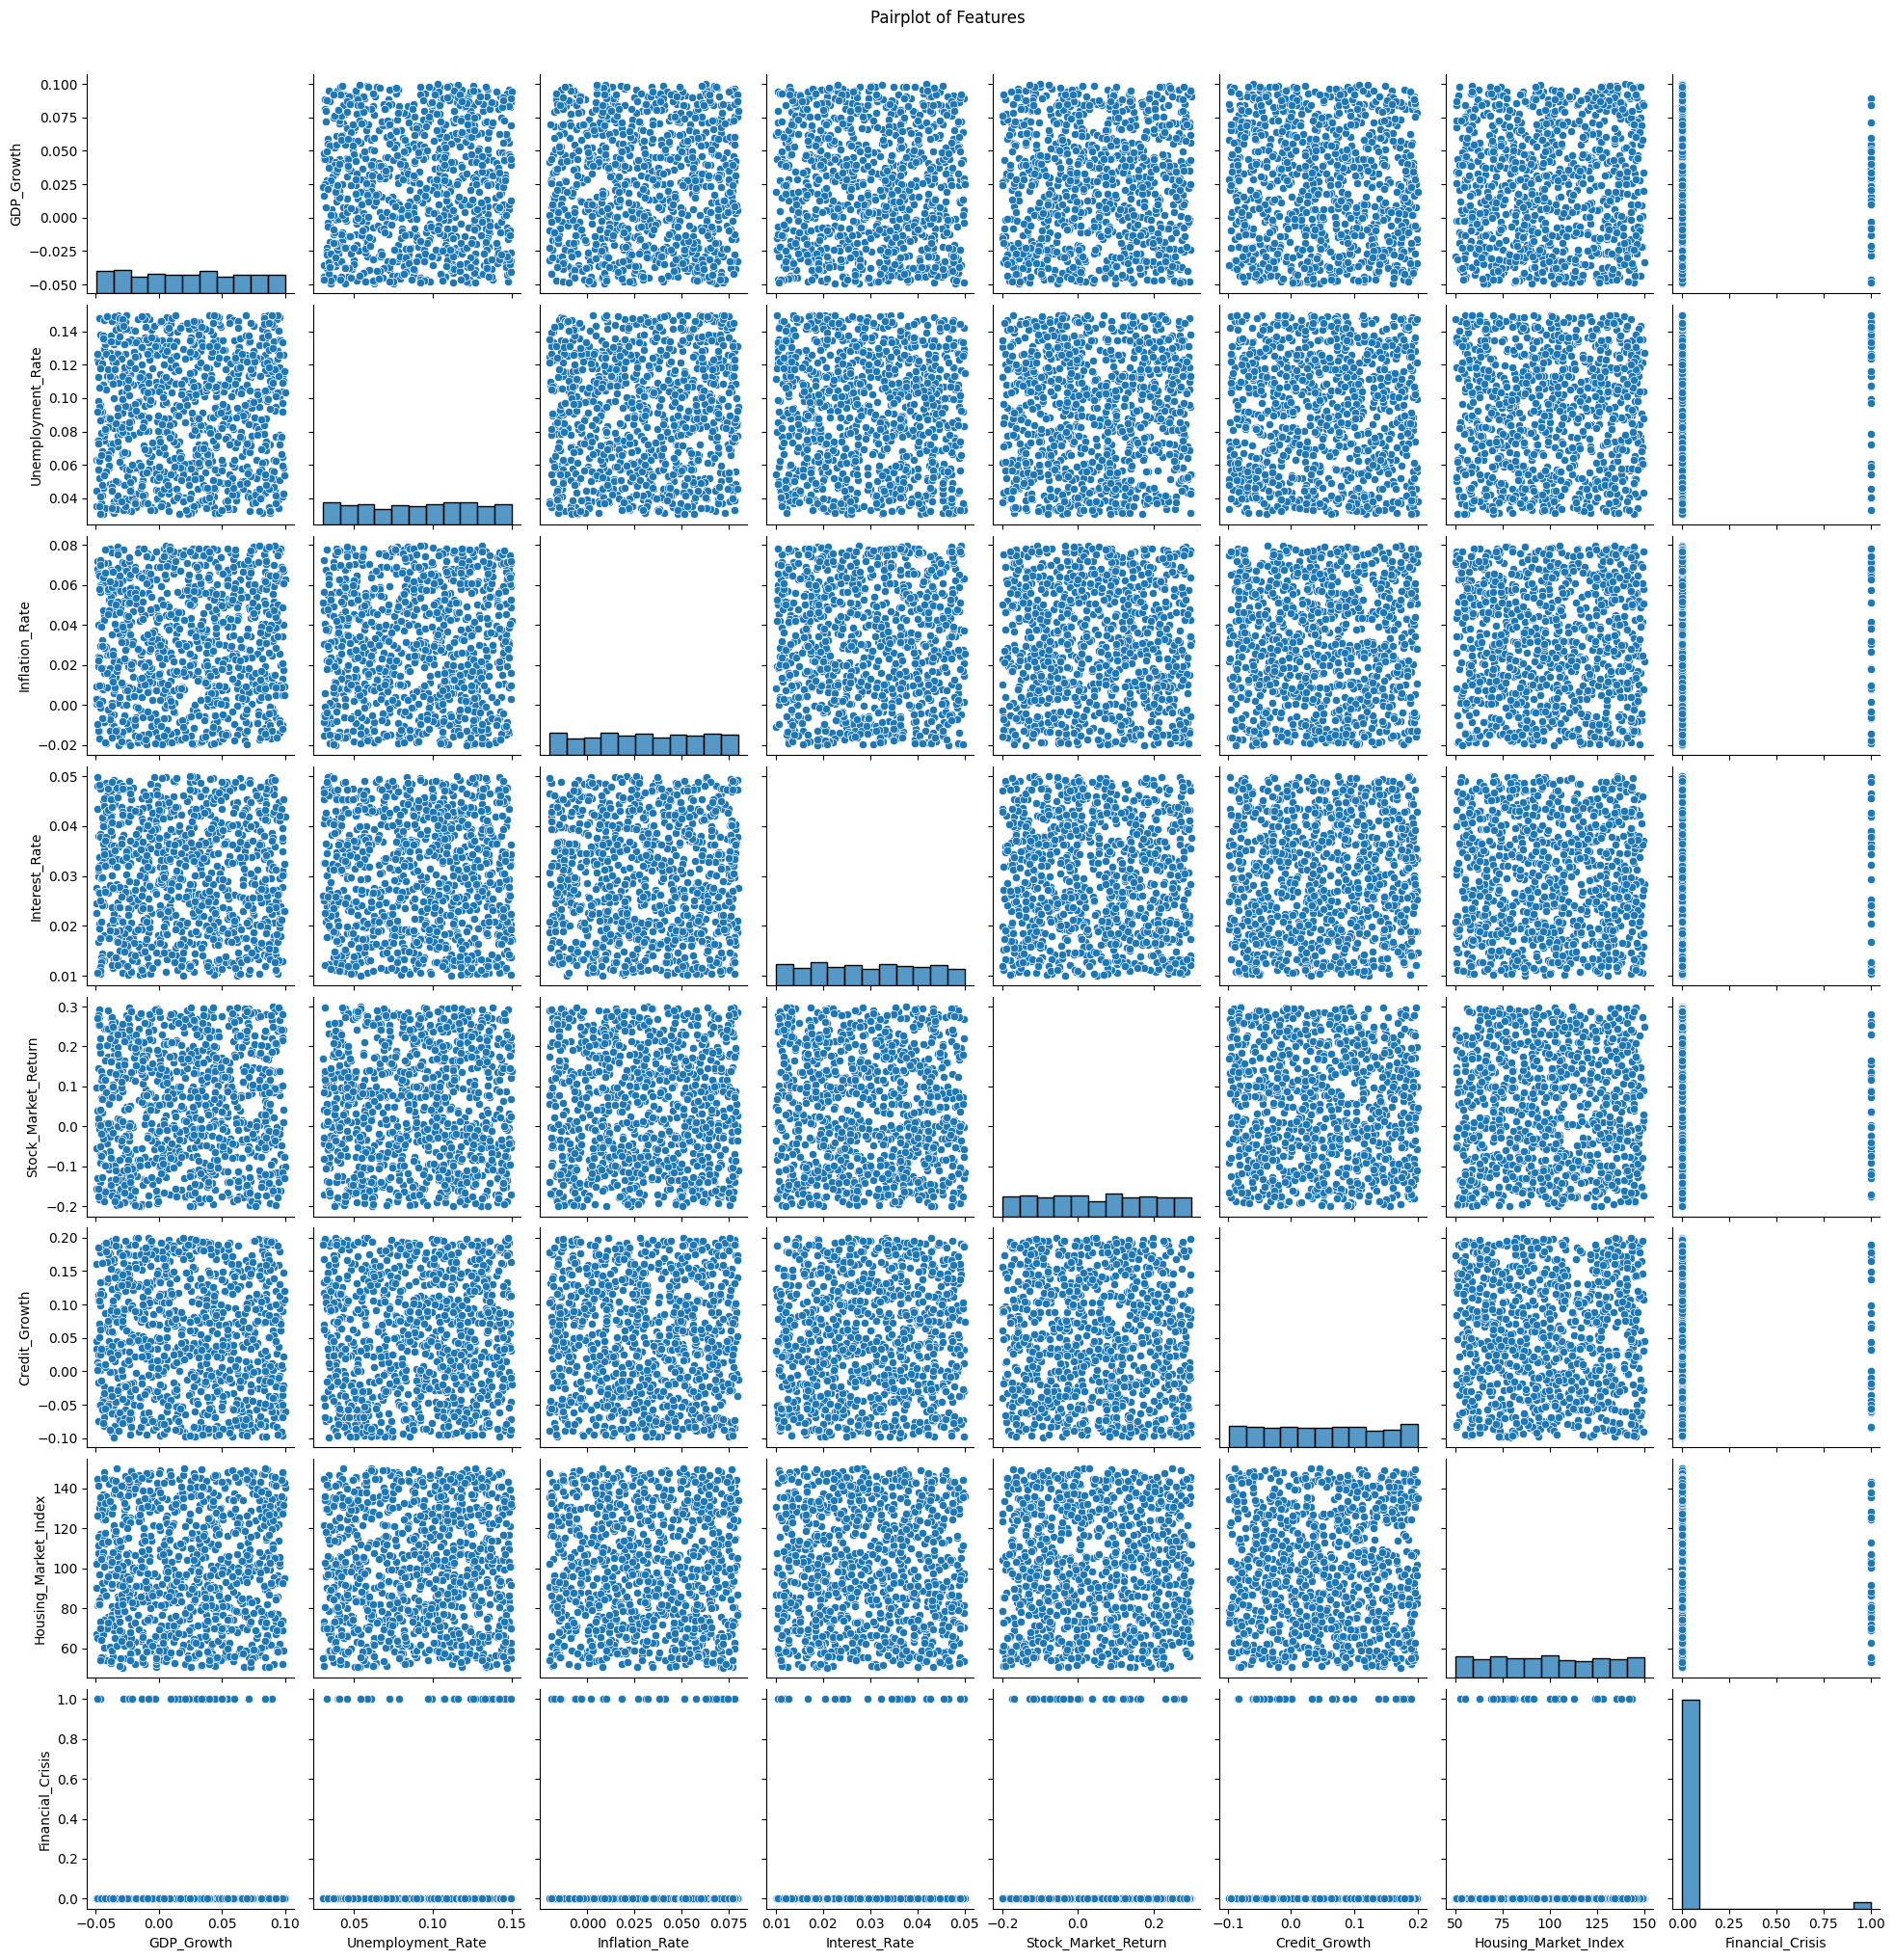

In [12]:
# Plot pairplot to see the relationships between variables
sns.pairplot(df.drop('Date', axis=1))
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['Date', 'Financial_Crisis'], axis=1)), columns=df.columns[1:-1])
df_scaled['Financial_Crisis'] = df['Financial_Crisis']

# Prepare the data for classification
X = df_scaled.drop('Financial_Crisis', axis=1).values
y = df_scaled['Financial_Crisis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM and GRU models
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# Train the LSTM model
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11600     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11651 (45.51 KB)
Trainable params: 11651 (45.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.6716 - accuracy: 0.7500 - val_loss: 0.6299 - val_accuracy: 0.9650
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.9700 - val_loss: 0.5227 - val_accuracy: 0.9650
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.9700 - val_loss: 0.3897 - val_accuracy: 

In [15]:
from tensorflow.keras.layers import GRU

# Define the GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()

# Train the GRU model
history_gru = gru_model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                8850      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8901 (34.77 KB)
Trainable params: 8901 (34.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 3s 29ms/step - loss: 0.6525 - accuracy: 0.7237 - val_loss: 0.5692 - val_accuracy: 0.9650
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.4877 - accuracy: 0.9700 - val_loss: 0.4029 - val_accuracy: 0.9650
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.3269 - accuracy: 0.9700 - val_loss: 0.2660 - val_accuracy: 0

In [16]:
from tensorflow.keras.layers import Flatten

# Define the DNN model
dnn_model = Sequential([
    Flatten(input_shape=(1, X_train.shape[1])),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.summary()

# Train the DNN model
history_dnn = dnn_model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 7)                 0         
                                                                 
 dense_6 (Dense)             (None, 100)               800       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.5200 - accuracy: 0.9150 - val_loss: 0.3649 - val_accuracy: 0.9650
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2648 - accuracy: 0.9700 - val_loss: 0.2099 - val_accuracy: 0.9650
Epoch 3